In [1]:
# import the libraries
import cv2
import numpy as np
import pylab
from cudamodules import StereoMatchingBasic
from tools import PlotTools

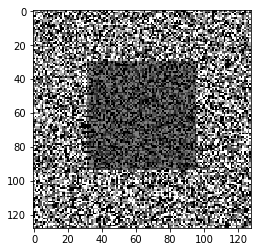

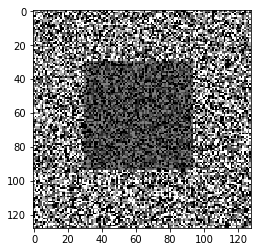

In [2]:
img1 = cv2.imread('Data/leftTest.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('Data/rightTest.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
PlotTools.display_img(img1)
PlotTools.display_img(img2)

cudamodules/StereoMatchingBasic.py:83: UserWarning: The CUDA compiler succeeded, but said the following:
nvcc warning : The 'compute_20', 'sm_20', and 'sm_21' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).

  """)


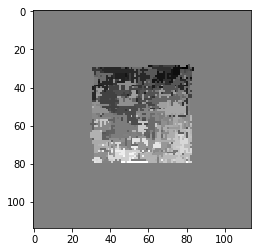

In [3]:
PlotTools.display_and_save(StereoMatchingBasic.stereo_matching_basic(img1, img2, 15), "PS2-1-a-1")

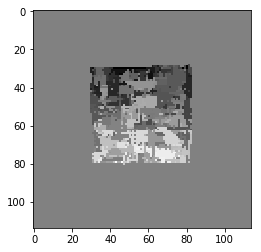

In [4]:
PlotTools.display_and_save(StereoMatchingBasic.stereo_matching_basic(img2, img1, 15), "PS2-1-a-2")